In [1]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from scipy.optimize import curve_fit

from pathlib import Path

In [2]:
from packaging.version import Version
if Version(matplotlib.__version__) > Version('3.7.0'):
    raise RuntimeWarning('tikzplotlib cant work with matplotlib > 3.7')

import tikzplotlib
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

In [3]:
ROOT_PATH = Path('./..')

LATEX_PATH = ROOT_PATH / 'paper'

RESOURCES_PATH = ROOT_PATH / 'resources'

CPP_BUILD_PATH = ROOT_PATH / 'build'

In [4]:
lmbd = 40
h = 2 * lmbd

A = h / 20 # change coef

k = 2 * np.pi / lmbd
g = 9.8

c = np.sqrt(g / k)

omega = k * c


def wave(x: float, t: float) -> float:
    return A * np.sin(k * x + omega * t)

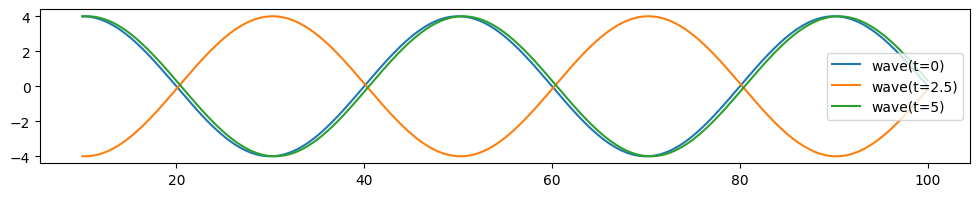

In [5]:
fig, ax = plt.subplots(figsize=(12, 2))

x = np.linspace(10, 100, 1000, endpoint=True)
ax.plot(x, wave(x, 0), label=f'wave(t=0)')
ax.plot(x, wave(x, 2.5), label=f'wave(t=2.5)')
ax.plot(x, wave(x, 5), label=f'wave(t=5)')

plt.legend()
plt.show()